# **Final Project.**
# **(Afnan Madi)**

**1.Problem Definition and Dataset Selection**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


**2.Data Preprocessing and Exploration**

/tmp/ipython-input-13-2509234962.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-13-2509234962.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

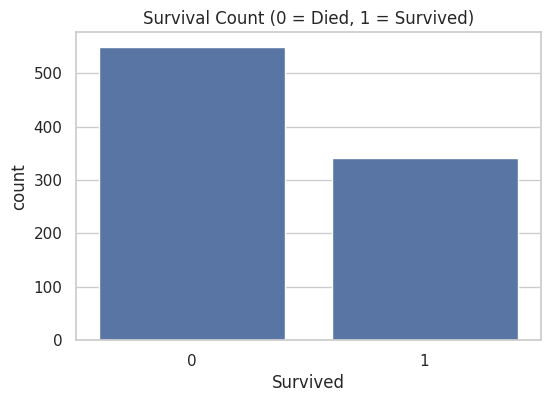

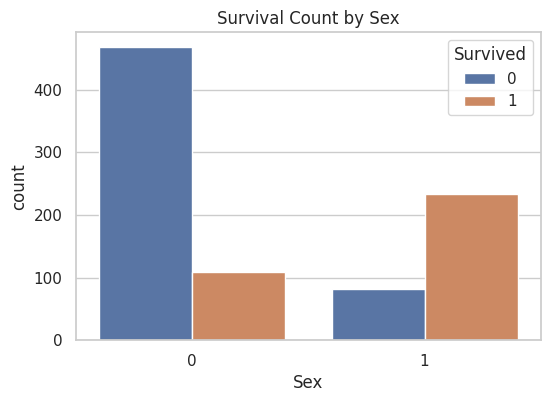

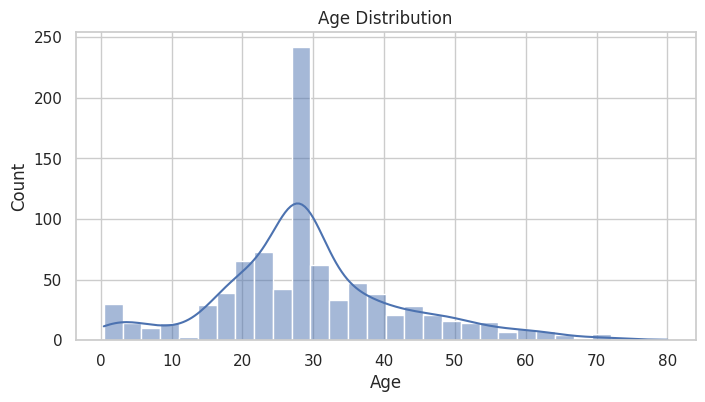

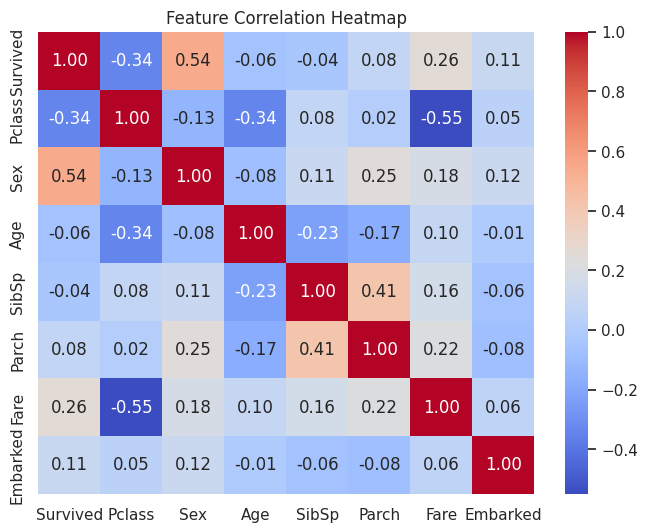

In [ ]:

#  Reload dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')

# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

#Data Cleaning and Preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Visualization
sns.set(style="whitegrid")

# 1. Survival count
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.show()

# 2. Survival by Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.show()

# 3. Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# 4. Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

**3.Model Selection and Development**

In [ ]:
#Model Training and Tuning using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define feature and target again
X = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the classifier
rfc = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find best parameters
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Display best parameters
print("✅ Best Parameters from GridSearchCV:")
print(grid_search.best_params_)


✅ Best Parameters from GridSearchCV:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


**4.Model Evaluation and Optimization**

✅ Model Performance on Test Set:
Accuracy :  0.8101
Precision: 0.8226
Recall   : 0.6892
F1-Score : 0.7500

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



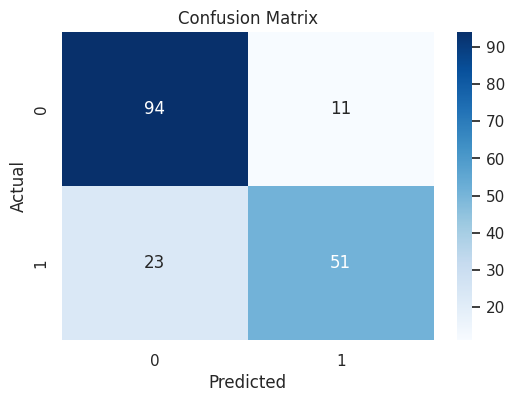

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = best_model.predict(X_test)

# Print evaluation metrics
print("✅ Model Performance on Test Set:")
print(f"Accuracy :  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred):.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**5.Model Deployment and Presentation**

In [ ]:
# 5. Predict Survival Based on User Input

def predict_passenger():
    print(" Please enter passenger details:")

    Pclass = int(input("Passenger class (1, 2, or 3): "))
    Sex = input("Sex (male/female): ")
    Age = float(input("Age: "))
    SibSp = int(input("Number of siblings/spouses aboard: "))
    Parch = int(input("Number of parents/children aboard: "))
    Fare = float(input("Fare: "))
    Embarked = input("Embarked port (S/C/Q): ")

    # Prepare input data
    input_data = pd.DataFrame([{
        'Pclass': Pclass,
        'Sex': 0 if Sex.lower() == 'male' else 1,
        'Age': Age,
        'SibSp': SibSp,
        'Parch': Parch,
        'Fare': Fare,
        'Embarked': {'S': 0, 'C': 1, 'Q': 2}[Embarked.upper()]
    }])

    # Predict and show result
    prediction = best_model.predict(input_data)[0]
    result = " Survived" if prediction == 1 else " Did not survive"
    print(f"\n Prediction result: {result}")

# Run the function to start user interaction
predict_passenger()

 Please enter passenger details:
Passenger class (1, 2, or 3): 3
Sex (male/female): male
Age: 50
Number of siblings/spouses aboard: 3
Number of parents/children aboard: 2
Fare: 72.5
Embarked port (S/C/Q): s

 Prediction result:  Did not survive
